Hypothesis: Which marketing campaign can have the most effective ROAS(Return of Ads spent) and ROI(Return of investment)?



#Column title explanation

# 1.) ad_id: an unique ID for each ad.

# 2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.
own platform
# 3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.
Facebook runs campaign 

# 4.) age: age of the person to whom the ad is shown.

# 5.) gender: gender of the person to whom the ad is shown

# 6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

# 7.) Impressions: the number of times the ad was shown.

# 8.) Clicks: number of clicks on for that ad.

# 9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

# 10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

# 11.) Approved conversion: Total number of people who bought the product after seeing the ad.
Approach
# what datatype do you want per column float? str? int? 
# clean the data to match the same datatype casting 
# using apply method


# how to handle null values for each column casting figure nan values whether is str or float 
no null  but how to check nan?
# dropping bad rows 


https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking?resource=download



Aim: How to calculate ROI & ROAS

ROAS = Revenue/ Cost = total income from ads / total ads spent 

ROI = Net income/ cost =  (total income from ads - spent)/ spent 

#Find Gain and cost of investment 
#spent = cost of investment 
# Approved conversion = Gain from investement 
# Need to create a new column for “total income from ads” assume 1 Approved conversion = $100 Approved Income 
#Create new column "Approved total income" for people who bought product 

check column have all same types 
convert the columns to strs : age, gender 
#analysis the dataset


try to figure out why you top ROI campaign perform so well based on those conditions?
Approved conversion sorting highest to lowest 
compare each column and find out why they perform so well? 

based your finding make your recommendation to increase the performance ( being a  higher ROI) of your best performing campaign 



Gender
M
52%
F
48%
age
30-34
37%
45-49
23%
Other (458)
40%

In [1]:
!pip install openpyxl
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output 
"""Install required libs, folders, and permissions"""
# Setup kaggle configs for google colab notebook
kaggleData = {"username":"stevewxh","key":"e49be00387d2ba061119746121d4000f"}
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"stevewxh","key":"e49be00387d2ba061119746121d4000f"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

"""Login, extract and unzip data"""
import os
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

# Authentica api and download data set
api = KaggleApi()
api.authenticate()
# Copy command to grab data
!kaggle datasets download -d "loveall/clicks-conversion-tracking"
# Unzip file to get data
!unzip clicks-conversion-tracking.zip

# Clear console output 
clear_output()
print("Finished Successfully")


Finished Successfully


In [2]:
import pandas as pd 
raw_csv_data = pd.read_csv("KAG_conversion_data.csv", sep=",")
raw_csv_data.head()             

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
print(type(raw_csv_data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
df = raw_csv_data.copy()

In [5]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [6]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None
# expand the columns width to max and rows length to max

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [8]:
df.isnull().values.any() #check for all nulls and nan data is clean

False

In [9]:
#create a new column for “Approved total income” assume 1 Approved conversion = $100 Approved Income & concatenate
df['Approved total income'] = df['Approved_Conversion'] * 100
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Approved total income
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,100
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,100


In [10]:
#ROAS = Revenue/ Cost = total income from ads / total ads spent = Approved total income / Spent 
#ROI = Net income/ cost = (total income from ads - spent)/ spent
#try to filter NaN to string
# Found some bigger values also contained inf through column sorting process
# try to set all 0 values in Spent column as min() + 0.5
condition  = (df['Spent'] == 0 )
df.loc[condition, 'Spent'] = df['Spent'].min() + 0.5
df['ROAS'] = df['Approved total income'] / df['Spent']
df['ROI'] = (df['Approved total income'] - df['Spent']) / df['Spent']
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Approved total income,ROAS,ROI
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,100,69.930072,68.930072
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0,0.000000,-1.000000
2,708771,916,103920,30-34,M,20,693,0,0.50,1,0,0,0.000000,-1.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0,0.000000,-1.000000
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,100,77.519382,76.519382


In [11]:
#check column have all same types convert the columns to strs : age, gender
df.gender.dtype


dtype('O')

In [12]:
df.age.dtype

dtype('O')

In [13]:
df.sort_values("Approved total income",ascending = False).head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Approved total income,ROAS,ROI
528,1121104,1178,144533,30-34,M,16,2080666,202,360.150001,40,21,2100,5.830904,4.830904
525,1121100,1178,144532,30-34,M,15,3052003,340,639.949998,60,17,1700,2.656458,1.656458
531,1121108,1178,144533,30-34,M,16,984521,95,163.899997,26,14,1400,8.541794,7.541794
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,1400,5.510726,4.510726
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,1300,2.123142,1.123142
579,1121206,1178,144554,30-34,M,29,227925,22,35.310000,22,12,1200,33.984707,32.984707
1127,1314398,1178,179965,40-44,F,112,1137635,211,301.049999,30,10,1000,3.321707,2.321707
524,1121098,1178,144532,30-34,M,15,1267550,123,236.769999,24,10,1000,4.223508,3.223508
867,1121824,1178,144661,30-34,F,29,1705246,295,429.479998,23,10,1000,2.328397,1.328397
807,1121677,1178,144636,45-49,M,29,1391924,258,422.840004,17,10,1000,2.364961,1.364961


Approved total income sorting highest to lowest findings:
Campaign ID 1178 is most popular campaign 

Most people age between 30-34 tend to buy more products from the top 10 total income while only onter two group age appear 

Most people who willing to buy product are male including 70% are male 30% for female for the top 10 product income 
Interest seems just a code for people buy the product most appearred code are 15, 16 & 29

Impressions seems over 10 million have better income but there are rare case like top3 and top6 have very low impressions compare to other still get better income among the rest

clicks seems have similar pattern as impressions most clicks over 100+ top3 and top 6 have lower clicks 

ad spent for top10 total income is above 200+, again for top3 and top6 have really low amt of spent but still have very high gain compare to others 

Total conversion are significant high over top 10 total income meaning more people asking for this product from market campaign 

Approved conversion coorelate to total income so they increase linear 
Recommendation: For the hiest approved total income Campaign should use ID 1178 and spread the ads to people age between 30-34 and most interested apps used by males or other software they use

spent as much as they can to gained the most Approved total income

In [14]:
#Data visualization decide on the comparison make as many as you can no limit
df.sort_values("ROAS",ascending = False).head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Approved total income,ROAS,ROI
267,777105,936,115615,45-49,M,63,4333,1,0.18,1,1,100,555.555534,554.555534
343,779778,936,116087,30-34,F,31,2466,0,0.50,2,2,200,400.000000,399.000000
432,950079,936,123440,30-34,M,16,3142,0,0.50,2,2,200,400.000000,399.000000
464,950839,936,123567,30-34,M,24,246,0,0.50,2,2,200,400.000000,399.000000
154,747220,936,110837,30-34,M,15,2474,0,0.50,2,2,200,400.000000,399.000000
457,950745,936,123551,30-34,M,29,1514,0,0.50,2,2,200,400.000000,399.000000
215,776416,936,115500,45-49,F,19,3659,1,0.49,1,1,100,204.081628,203.081628
157,747248,936,110842,30-34,M,21,472,0,0.50,1,1,100,200.000000,199.000000
520,1121094,1178,144531,30-34,M,10,24362,0,0.50,1,1,100,200.000000,199.000000
203,748341,936,111024,45-49,F,64,1363,0,0.50,1,1,100,200.000000,199.000000


Campaign ID 936 has get the most ROAS while 1178 only spotted on 10th for top 10 ROAS

Most people age from 30-34 tend to buy more product and make the most ROAS 

Man seems attracted by products and buy more than female based on ROAS sorting 
clicks seems does not matter to ROAS

Spent is lower ROAS is higher since ROAS is calculate by Approved total income/ Spent

Recommendation: To get highest ROAS use lowest Spent, use campaign 936 and spread ads to age between 30-34 males 

In [15]:
#sorting based on  ROI  highest to lowest descending
df.sort_values("ROI",ascending = False).head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Approved total income,ROAS,ROI
267,777105,936,115615,45-49,M,63,4333,1,0.18,1,1,100,555.555534,554.555534
343,779778,936,116087,30-34,F,31,2466,0,0.50,2,2,200,400.000000,399.000000
432,950079,936,123440,30-34,M,16,3142,0,0.50,2,2,200,400.000000,399.000000
464,950839,936,123567,30-34,M,24,246,0,0.50,2,2,200,400.000000,399.000000
154,747220,936,110837,30-34,M,15,2474,0,0.50,2,2,200,400.000000,399.000000
457,950745,936,123551,30-34,M,29,1514,0,0.50,2,2,200,400.000000,399.000000
215,776416,936,115500,45-49,F,19,3659,1,0.49,1,1,100,204.081628,203.081628
157,747248,936,110842,30-34,M,21,472,0,0.50,1,1,100,200.000000,199.000000
520,1121094,1178,144531,30-34,M,10,24362,0,0.50,1,1,100,200.000000,199.000000
203,748341,936,111024,45-49,F,64,1363,0,0.50,1,1,100,200.000000,199.000000


campaign ID 936 seems is most effective on ROI Same as ROAS

Age around 30-34 people buy more product after watch campaign 

Male customer contribute the most on top 10 ROI, 30% are female
80% Impression are over one thousand but there are two under 500 impression get relatively high ROI compare to others

clicks does not seems good relation with ROI most are 0s

Spent lower ROI higher so most spent here is under 1 

Recommendation: for the highest possible ROI the company should use campaign ID 936 to male at age range between 30-34, with people have highest impression with lowest budget on spent

In [16]:
#Use seaborne and matplotlib library to compare relationship between most popular xyz campaign/group of most popular age/gender/interest/ Impression/ Clicks/ Spent  to Approved total income
#find most popular unique ID
df['xyz_campaign_id'].unique()
df['xyz_campaign_id'].replace({916:"Campaign1", 936:"Campaign2", 1178:"Campaign3"}, inplace=True) # replace name for just campaign iD
df.head()

array([ 916,  936, 1178])

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Approved total income,ROAS,ROI
0,708746,Campaign1,103916,30-34,M,15,7350,1,1.43,2,1,100,69.930072,68.930072
1,708749,Campaign1,103917,30-34,M,16,17861,2,1.82,2,0,0,0.000000,-1.000000
2,708771,Campaign1,103920,30-34,M,20,693,0,0.50,1,0,0,0.000000,-1.000000
3,708815,Campaign1,103928,30-34,M,28,4259,1,1.25,1,0,0,0.000000,-1.000000
4,708818,Campaign1,103928,30-34,M,28,4133,1,1.29,1,1,100,77.519382,76.519382


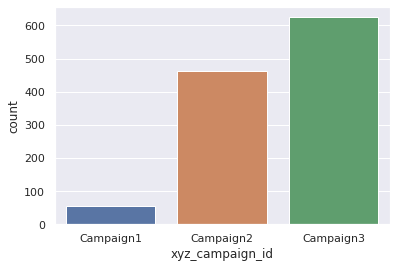

In [17]:
# Count for the most popular three campaigns 
sns.countplot(x='xyz_campaign_id', data = df)
plt.show()

Campaign3 has most number of ads followed by Campaign2 

<BarContainer object of 1143 artists>

Text(0, 0.5, 'Approved Total Income')

Text(0.5, 1.0, 'Company Campaign vs Approved Total income ')

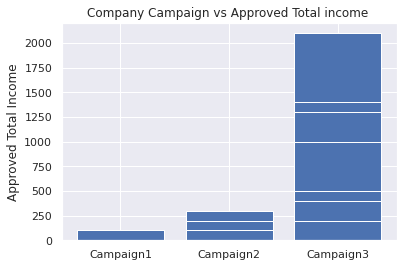

In [18]:
#Compare Those campaign to approved total income， creating bar comparison
plt.bar(df['xyz_campaign_id'], df['Approved total income'] ) 
plt.ylabel("Approved Total Income")
plt.title("Company Campaign vs Approved Total income ")
plt.show()

Campaign 3 has the best approved total income so most people buy through market 

<BarContainer object of 1143 artists>

Text(0, 0.5, 'ROAS')

Text(0.5, 1.0, 'Company Campaign vs ROAS')

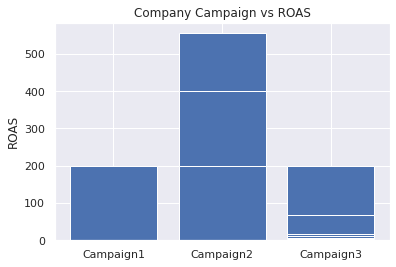

In [19]:
#Compare Campaign to ROAS
plt.bar(df['xyz_campaign_id'], df['ROAS'] ) 
plt.ylabel("ROAS")
plt.title("Company Campaign vs ROAS")
plt.show()

Apparently we found different result compare to our first bar chart, Campaign 2 ID 936 have the best return on aid spent 

<BarContainer object of 1143 artists>

Text(0, 0.5, 'ROI')

Text(0.5, 1.0, 'Company Campaign vs ROI')

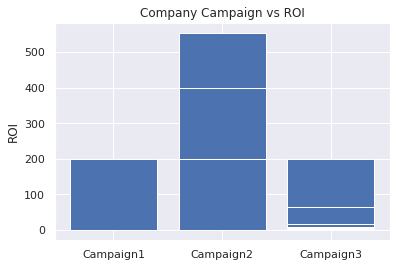

In [20]:
#Compare Campaign to ROAS
plt.bar(df['xyz_campaign_id'], df['ROI'] ) 
plt.ylabel("ROI")
plt.title("Company Campaign vs ROI")
plt.show()

No suprise ROI and ROAS have the same result as our Campaign 2 is the best Campaign to get the most effective ROI and ROAS among the three even though campaign3 have the best income result 

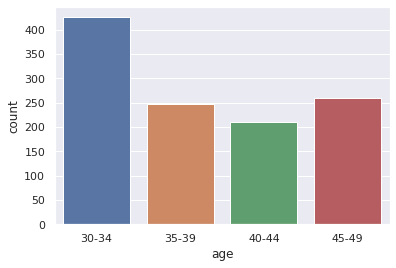

In [21]:
# Let's dig in deeper with age group to find more age group percentage provide by dataset: 30-34 37% 45-49 23% Other  40%
# Let's count age variable on each category
sns.countplot(x='age', data=df)
plt.show()

Most people are in Age 30-34 followed by age 45-49

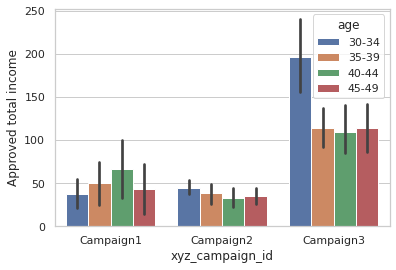

In [22]:
sns.set(style= "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df['xyz_campaign_id'],y=df['Approved total income'], hue = df['age'], data =tips)

We can see in Campaign1 age group 40-44 shows most interest and buy most products
However age group 30-34 buy most products  above other group for campaign2 and campaign3

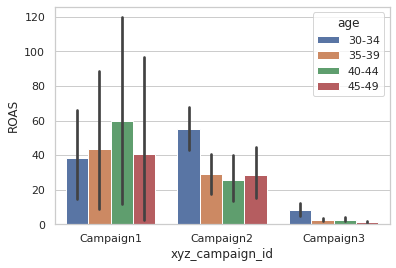

In [23]:
sns.set(style= "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df['xyz_campaign_id'],y=df['ROAS'], hue = df['age'], data =tips)

In Campaign1 people age 40-44 has the most effective ROAS, while in Camapaign2 and Campaign3 people age 30-34 has the most effective ROAS

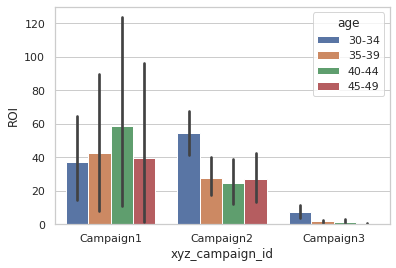

In [24]:
sns.set(style= "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df['xyz_campaign_id'],y=df['ROI'], hue = df['age'], data =tips)

In Campaign1 people age 40-44 has the most effective ROI, while in Camapaign2 and Campaign3 people age 30-34 has the most effective ROI



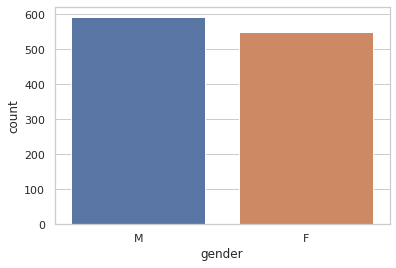

In [25]:
#Let's compare gender with three campaigns
sns.countplot(x='gender', data=df)
plt.show()

We have man slightly more than woman count 

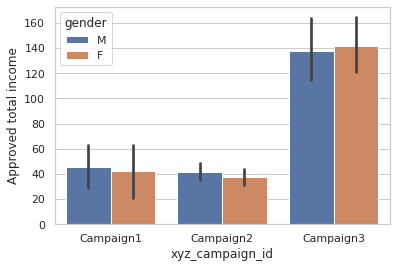

In [26]:
sns.set(style= "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df['xyz_campaign_id'],y=df['Approved total income'], hue = df['gender'], data =tips)

Man buy more than woman through campaign1 and campaign2. however we can see that campaign3 woman buy more than man

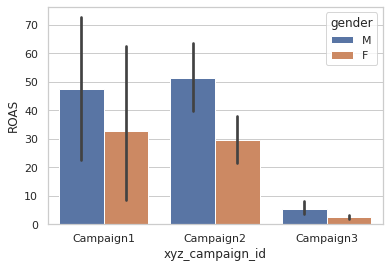

In [27]:
sns.set(style= "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df['xyz_campaign_id'],y=df['ROAS'], hue = df['gender'], data =tips)

Man have more effective ROAS than woman for all three popular campaigns


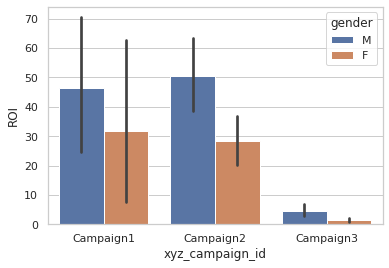

In [28]:
sns.set(style= "whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df['xyz_campaign_id'],y=df['ROI'], hue = df['gender'], data =tips)

Man have more effective ROI than woman for all three popular campaigns


Text(0.5, 1.0, 'Interest vs. Approved total income')

Text(0.5, 0, 'interest')

Text(0, 0.5, 'Approved total income')

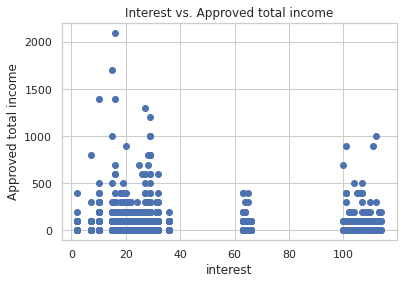

In [29]:
#Use scatter plot compare interest and Approved total income
plt.scatter(df['interest'],df['Approved total income'])
plt.title("Interest vs. Approved total income")
plt.xlabel('interest')
plt.ylabel('Approved total income')
plt.show()

interest between 0-40 code have relative highest approved total income and tend to buy more 
interest between 60-80 have lowest approved total income 
interest above 100 have some raise compare to 60-80 

Text(0.5, 1.0, 'Interest vs. ROAS')

Text(0.5, 0, 'interest')

Text(0, 0.5, 'ROAS')

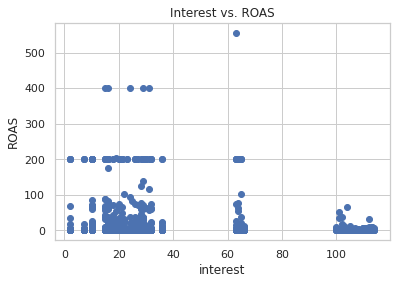

In [30]:
#Use scatter plot to compare Interest with ROAS
plt.scatter(df['interest'],df['ROAS'])
plt.title("Interest vs. ROAS")
plt.xlabel('interest')
plt.ylabel('ROAS')
plt.show()

interest between 0-40 has many effective ROAS but not the highest have some 200 and 400
interest between 60-80 has one most effective ROAS rest are relatively low compare to interest 0-20 
interest 100 above has the lowest ROAS 

Text(0.5, 1.0, 'Interest vs. ROI')

Text(0.5, 0, 'interest')

Text(0, 0.5, 'ROI')

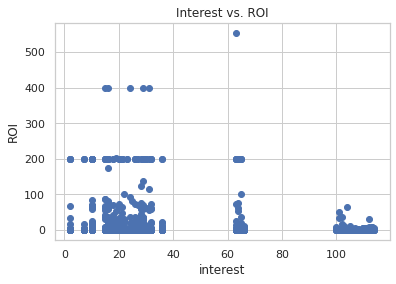

In [31]:
#Use scatterplotCompare interest with ROI 
plt.scatter(df['interest'],df['ROI'])
plt.title("Interest vs. ROI")
plt.xlabel('interest')
plt.ylabel('ROI')
plt.show()


No surprise we get same result as we compare to ROAS
interest between 0-40 has many effective ROI but not the highest have some 200 and 400
interest between 60-80 has one most effective ROI rest are relatively low compare to interest 0-20 
interest 100 above has the lowest ROI

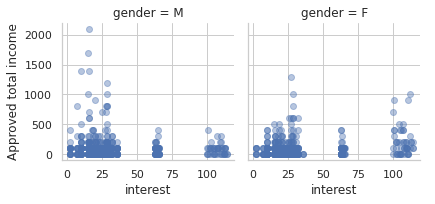

In [32]:
#Now we want to compare interest with Approved total income based on different gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'interest', 'Approved total income', alpha=.4)
g.add_legend()

Through two scatter plot we can easily tell that man buy more than woman through interest 0 to 50, while 50-75 interest two gender have similar results, above 100 interest woman buy more than man 

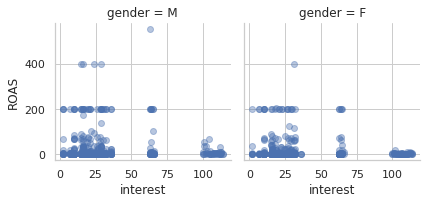

In [33]:
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'interest', 'ROAS', alpha=.4)
g.add_legend()

Man have more effective ROAS than woman 


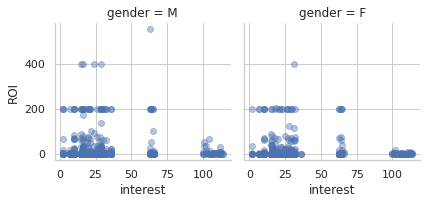

In [34]:
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'interest', 'ROI', alpha=.4)
g.add_legend()

Man have more effective ROI than woman

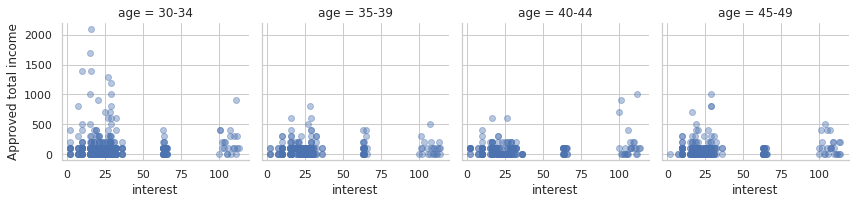

In [35]:
#Now we want to compare interest to approved total income based on different age group
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'interest', 'Approved total income', alpha=.4)
g.add_legend()

age group  30-34 has most approved total income above all between interest 0-50 
age 30-35 has highest approved total income between interest 50-75
interest above 100 age group 40-44 has highest approved total income

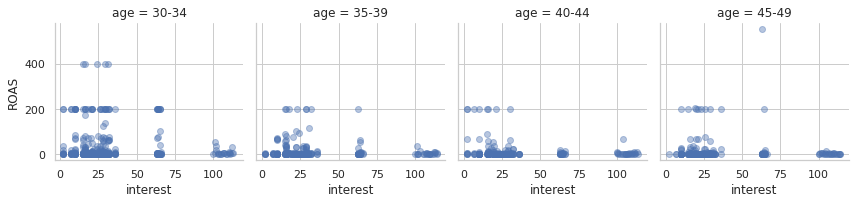

In [36]:
#Compare interest with ROAS based on age
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'interest', 'ROAS', alpha=.4)
g.add_legend()

 No suprise age group 30-34 has effective ROAS in interest between 0-50 & 100 above, while age group 45-49 have most effective ROAS at once but the rest effective is in age group 30-34

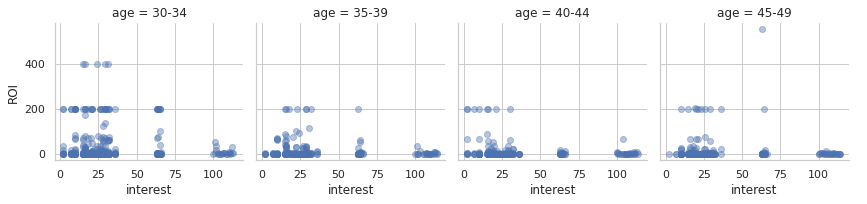

In [37]:
#Compare interest with ROI based on different age group
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'interest', 'ROI', alpha=.4)
g.add_legend()

No suprise age group 30-34 has effective ROI in interest between 0-50 & 100 above, while age group 45-49 have most effective ROI at once but the rest effective is in age group 30-34

(array([731., 146.,  79.,  49.,  34.,  23.,  16.,  20.,  16.,  13.,   4.,
          6.,   0.,   2.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([8.70000000e+01, 1.22163640e+05, 2.44240280e+05, 3.66316920e+05,
        4.88393560e+05, 6.10470200e+05, 7.32546840e+05, 8.54623480e+05,
        9.76700120e+05, 1.09877676e+06, 1.22085340e+06, 1.34293004e+06,
        1.46500668e+06, 1.58708332e+06, 1.70915996e+06, 1.83123660e+06,
        1.95331324e+06, 2.07538988e+06, 2.19746652e+06, 2.31954316e+06,
        2.44161980e+06, 2.56369644e+06, 2.68577308e+06, 2.80784972e+06,
        2.92992636e+06, 3.05200300e+06]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Impressions')

Text(0, 0.5, 'Frequency')

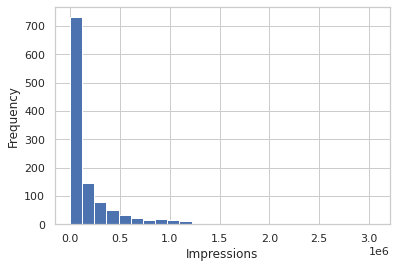

In [38]:
#Wanted to see Impressions frequency
plt.hist(df['Impressions'],bins=25)
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Impressions')

Text(0, 0.5, 'Approved total income')

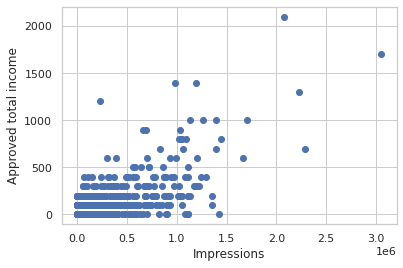

In [39]:
#Use scatterplot to compare impressions with Approved total income
plt.scatter(df['Impressions'],df['Approved total income'])
plt.xlabel("Impressions")
plt.ylabel("Approved total income")
plt.show()

There is a sudden rise after 1.5 of impressions

Text(0.5, 0, 'Impressions')

Text(0, 0.5, 'ROAS')

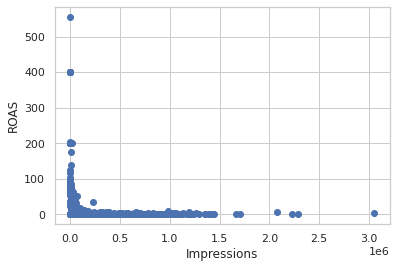

In [40]:
# Use scatterplot to compare impressions with ROAS
plt.scatter(df['Impressions'],df['ROAS'])
plt.xlabel("Impressions")
plt.ylabel("ROAS")
plt.show()

when ad was initailly shown has most effective ROAS but by the time impressions increase ROAS decrease

Text(0.5, 0, 'Impressions')

Text(0, 0.5, 'ROI')

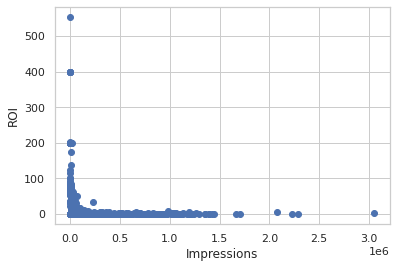

In [41]:
#Compare impressions with ROI
plt.scatter(df['Impressions'],df['ROI'])
plt.xlabel("Impressions")
plt.ylabel("ROI")
plt.show()

we get similar results as ROAS first couple impression get the most effective ROI and as impressions increase ROI decrease and keep at 0

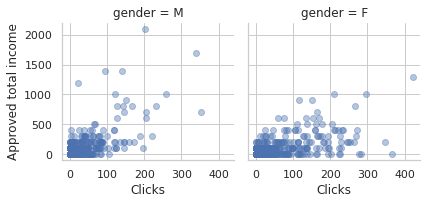

In [42]:
#Compare clicks with approved total income based on gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Clicks', 'Approved total income', alpha=.4)
g.add_legend()

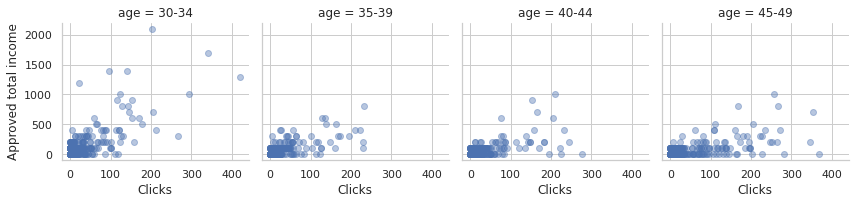

In [43]:
#Compare clicks with approved total income based on age group
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Clicks', 'Approved total income', alpha=.4)
g.add_legend()

We find age group 30-34 has the most interest to buy the product after the clicks than any other group followed byy age group 45-49

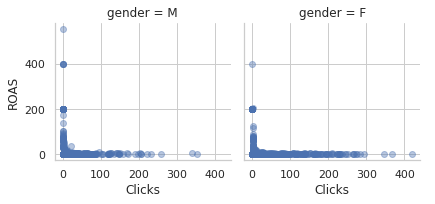

In [44]:
#Compare clicks with ROAS based on gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Clicks', 'ROAS', alpha=.4)
g.add_legend()

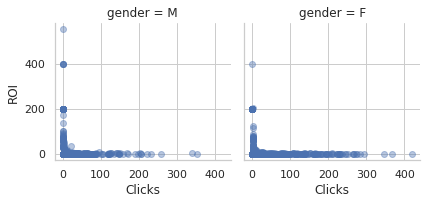

In [45]:
#Compare clicks with ROI based on gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Clicks', 'ROI', alpha=.4)
g.add_legend()

Man has more effective ROI than woman however woman have more clicks

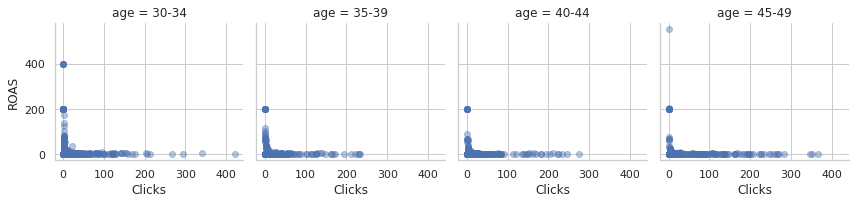

In [46]:
#Compare clicks with ROAS based on age
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Clicks', 'ROAS', alpha=.4)
g.add_legend()

Found There is one effective ROAS from age 45-49 but the rest is in age 30-34

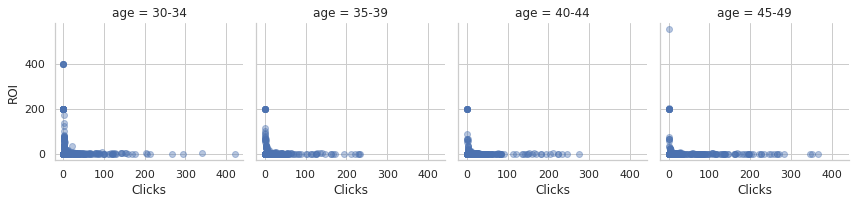

In [47]:
#Compare clicks with ROI based on age
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Clicks', 'ROI', alpha=.4)
g.add_legend()

(array([683., 144.,  85.,  42.,  42.,  24.,  25.,  16.,  11.,  18.,  12.,
          9.,   6.,   8.,   7.,   3.,   3.,   0.,   1.,   0.,   0.,   1.,
          0.,   2.,   1.]),
 array([1.80000007e-01, 2.57707999e+01, 5.13615999e+01, 7.69523998e+01,
        1.02543200e+02, 1.28134000e+02, 1.53724800e+02, 1.79315599e+02,
        2.04906399e+02, 2.30497199e+02, 2.56087999e+02, 2.81678799e+02,
        3.07269599e+02, 3.32860399e+02, 3.58451199e+02, 3.84041999e+02,
        4.09632799e+02, 4.35223599e+02, 4.60814399e+02, 4.86405199e+02,
        5.11995998e+02, 5.37586798e+02, 5.63177598e+02, 5.88768398e+02,
        6.14359198e+02, 6.39949998e+02]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Spent')

Text(0, 0.5, 'Frequency')

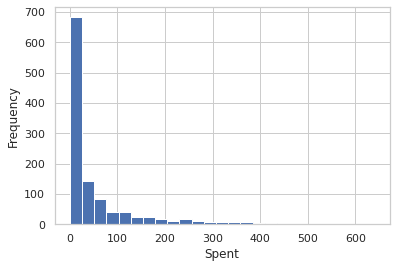

In [48]:
#Want to see spent frequency by using histogram
plt.hist(df['Spent'], bins=25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

We see majority of spent are close to 0 that was because before we have lot of 0 Spent data them we  change them all to .5 

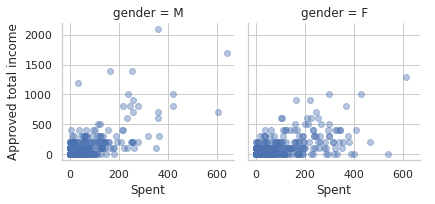

In [49]:
#Want to compare Spent with Approved total income based on gender scatterplot
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Spent', 'Approved total income', alpha=.4)
g.add_legend()

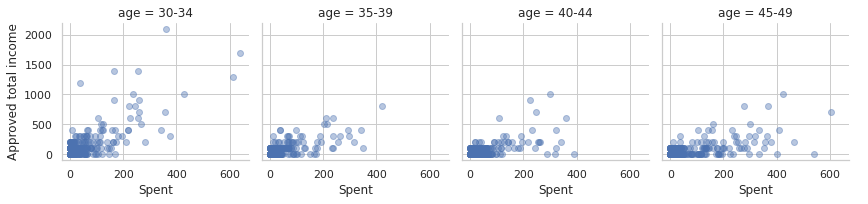

In [50]:
#Use scatterplot compare spent with approved total income based on age
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Spent', 'Approved total income', alpha=.4)
g.add_legend()

ad spent less but age 30-34 have the most tendency to buy products than any other group, other age group need to spend more on ads then they will buy

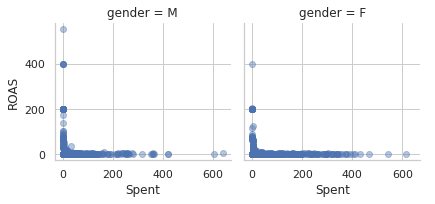

In [51]:
#Want to compare Spent with ROAS based on gender by scatterplot
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Spent', 'ROAS', alpha=.4)
g.add_legend()

Woman has more effective ROAS than man after ad spent increas, while at initial man has more effective ROAS with minimum spent


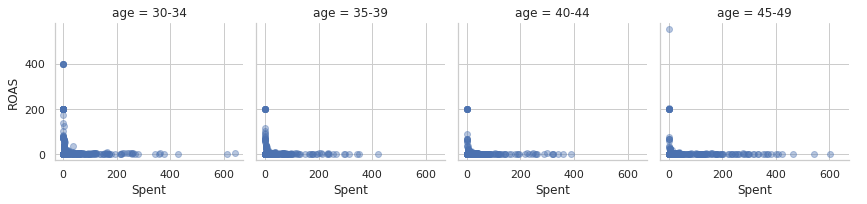

In [52]:
#Want to compare Spent with ROAS based on age by scatterplot
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Spent', 'ROAS', alpha=.4)
g.add_legend()

Age 30-34 has most effective ROAS with the least spent while rest of age group need ad spent for certain amount to see results

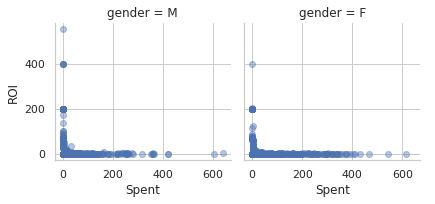

In [53]:
#Want to compare Spent with ROI based on gender by scatterplot
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Spent', 'ROI', alpha=.4)
g.add_legend()

Female has more effective ROI than man 

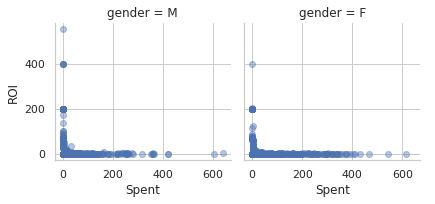

In [54]:
#Want to compare Spent with ROI based on gender by scatterplot
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Spent', 'ROI', alpha=.4)
g.add_legend()

Woman has more effective ROI than man 

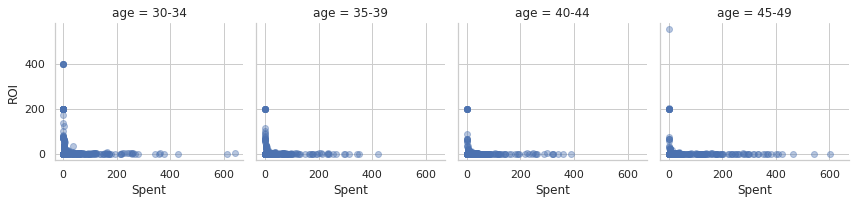

In [55]:
#Want to compare Spent with ROI based on age by scatterplot
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Spent', 'ROI', alpha=.4)
g.add_legend()

Found There is one effective ROI from age 45-49 but the rest is in age 30-34 same as ROAS results

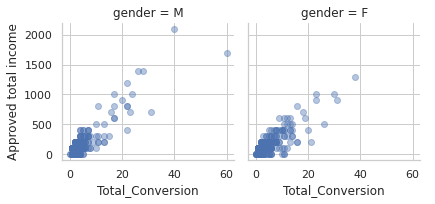

In [56]:
#Compare Total conversion with Approved total income based on gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Total_Conversion', 'Approved total income', alpha=.4)
g.add_legend()

Woman buy more products than more after enquired the product, however man have more enquiring than woman

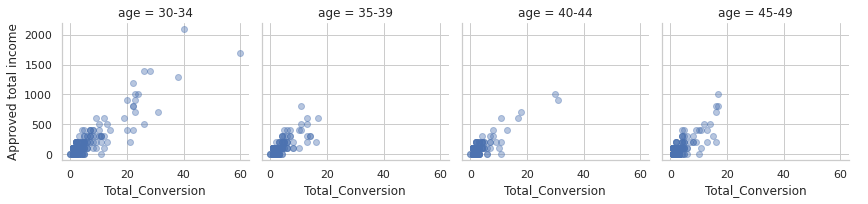

In [57]:
#Compare total conversion with Approved total income based on age 
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Total_Conversion', 'Approved total income', alpha=.4)
g.add_legend()

Age 30-34 people have most tendency to buy products after enquiring about the product

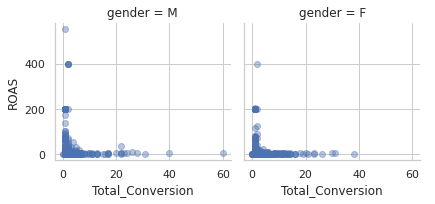

In [58]:
#Compare Total conversion with ROAS based on gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Total_Conversion', 'ROAS', alpha=.4)
g.add_legend()

Man has more effective ROAS than woman after enquiring about the product, Woman enquiring more than man

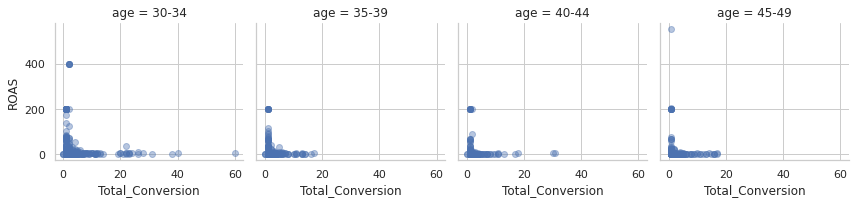

In [59]:
#Compare total conversion with ROAS based on age
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Total_Conversion', 'ROAS', alpha=.4)
g.add_legend()

There is only one most effective ROAS appear for age 45-49 the rest most effective group are in 30-34

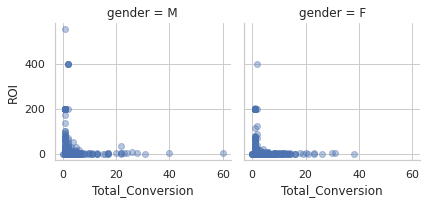

In [60]:
#Compare Total conversion with ROI based on gender
g=sns.FacetGrid(df,col='gender')
g.map(plt.scatter,'Total_Conversion', 'ROI', alpha=.4)
g.add_legend()

Woman enquiring products more than man, however man has most effective ROI than woman after enquiring about the product 

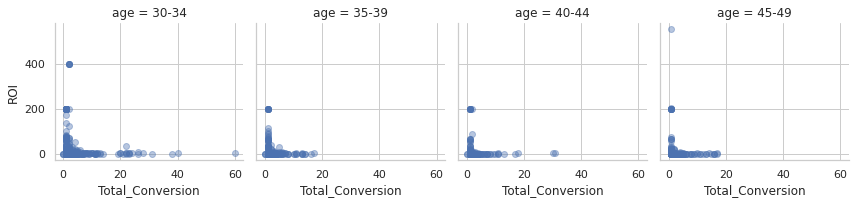

In [61]:
#Compare total conversion with ROI based on age
g=sns.FacetGrid(df,col='age')
g.map(plt.scatter,'Total_Conversion', 'ROI', alpha=.4)
g.add_legend()

Again we found same result as ROAS only one most effective ROI in age 45-49 rest most effective ROI all lies in age 30-34

age 30-34 has the most effective ROI

Summary:
Three most popular campaigns:
*   Campaign3 has the most number of ads followed by Campaign2.
*   Campaign3 has the most number of approved total income count meaning more people buy product through Campaign3.
*   Campaign 2 has the most effective ROI and ROAS .

Age group:
* Age 30-34 shows most interest to Campaign 2 & Campaign3, while Age 40-44 shows most interest to Campaign1.
* Age 30-34 has most effective ROAS and ROI on Campaign2 & Campaign3, Age 40-44 shows has most effective ROAS and ROI on Campaign1.

Gender:
* Both gender has similar interest on three campaigns, Man shows slightly more interest than woman on Campaign1 & 2, Woman shows slightly more interest than man on Campaign3.
* Man has more effective ROAS and ROI than woman on all three Campaigns.

Interest:
* People have interest between 0-40 are the most buy product, people 60-80 interest shown the least interest to buy product, found that interest above 100 have a sudden rise on buying products, but not as much as interest between 0-40.
* People have interest between 0-40 has most effective ROI and ROAS, while people with 60-80 has one most effective ROI and ROAS than 0-40 but the rest was expected to be lower than interest between 0-40, interest with 100 above does not have effective ROAS and ROI 
* Man buy more products than woman under interest 100, while above 100 interest woman buy more products than man.
* Age 30-34 buy most products between interest 0-40, age 35-39 buy most products between interest 50-75, age 40-44 buy most products above 100 itnerest
Overall age 30-34 buy most products followed by age 45-49
* Age 30-34 has most effective ROAS and ROI among all of age group


Impressions:
* People buy more products as impressions increase 
* Product has most effective ROAS and ROI when Impressions first appear, as impression increase, ROAS and ROI decrease then approach to 0

People bought after Clicks:
* Woman buy more products than man after clicks
* Age 30-34 buy more products than any other group after clicks
* Man has more effective ROAS and ROI than woman after clicks
* Age 40-45 has one most effective ROAS and ROI however majority of effective ROAS and ROI is in age range 30-34

Money spent:
* Man buy more products than woman spent are less than woamn as well. Man has more effective ROAS and ROI than woman
* Age 30-34 buy the most products among four age groups, Age 30-34 has the most effective ROAS and ROI as well.

People bought product after enquiring about the product
* It seems like woman buy more products than more after enquired the product, however man have more enquiring than woman.
* Man has more effective ROAS and ROI than woman 
* Age 40-45 has one most effective ROAS and ROI, however major effective ROAS and ROI is in age 30-34










# Conclusion on our Hypothesis

Hypothesis: Which marketing campaign can have the most effective ROAS(Return of Ads spent) and ROI(Return of investment)?

Recommendations: 
From different kinds of comparison based on different categories 

1. We found Campaign2 has the most effective ROAS and ROI
2. We should aim to use Campaign2 more on people age between 30-34 as data shows they have most effective ROAS and ROI, company should find out which popular website or apps age 30-34 used most often and consider use as much budget as possible to invest
3. Regard gender part we should be focus spread the ads on more man used websites or apps to increase the chance to give us best ROAS and ROI
4. Company should use campaign2 on people have interest between 0-50 as in this range data shows company can get best ROAS and ROI
5. Impressions and Clicks data vizs told us people have high tendency to buy more products once they see and click ads
6. Spent comparison told us that company do not need spend much on aid they can get best ROAS and ROI
7. When people start to enquiring about the product, they are more likely decide to buy the product